# Módulo 5 Actividad 2

**Intención del aprendizaje esperado:**


2. Elaborar un modelo predictivo de regresión lineal simple utilizando técnicas de validación cruzada y el lenguaje Python para resolver un problema.

## Ejercicios Planteados


**Ejercicio:** *Suponga que le han pedido averiguar si existe una relación entre el número de veces que batean los jugadores de un equipo de béisbol y el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido para los siguientes datos:*

In [2]:
import pandas as pd

equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.", "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago", "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona", "Toronto","Minnesota","Florida","Pittsburgh",
           "Oakland","Tampa", "Atlanta","Washington","San.F","San.I","Seattle"]

bateos = [5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598, 5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559, 5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570, 593, 556]


datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})

datos.head(3)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


## Para esto obtenga lo siguiente:

1. Obtenga la distribución de los datos
2. Calcule la correlación de Pearson. Interprete su valor

==================================== GRAFICOS DE DISTRIBUCIÓN BATEOS Y RUNS ===================================


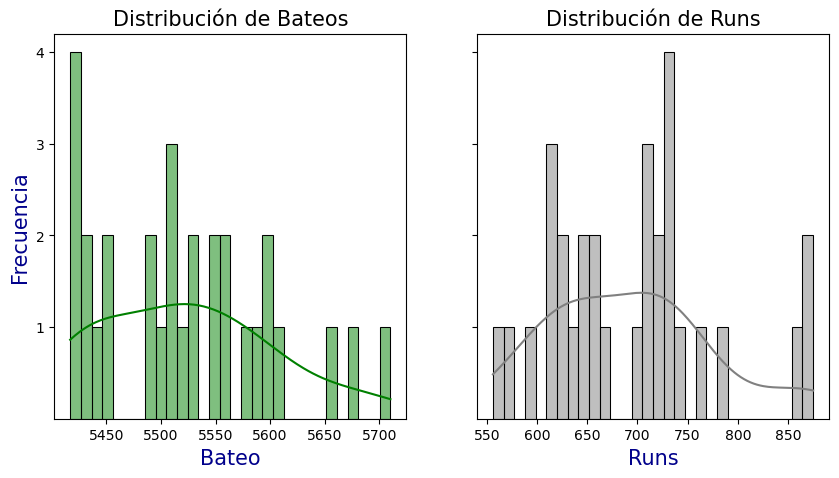


===================================== ÍNDICE DE CORRELACIÓN DE PEARSON (r) ====================================

El índice correlación de Pearson nos indica el grado de paralelismo entre variables.
Si bien este indicador por si solo no explica ni asegura la causalidad de los resultados, es un indicador que nos permite tener una visión general de la interrelación entre distintos eventos.
El índice de correlación entrega resultados entre "-1 y 1", en donde el -1 significa una correlación perfecta pero en sentido inversamente proporcional y el 1 una correlación perfecta en sentido directamente proporcional.
El resultado 0, en cambio, indica que no existe ninguna relación entre los eventos estudiados.
Para las variables en estudio, el índice de correlación de Pearson es de 0.6106.  Este resultado nos indica que existe una correlación de caracter positivo entre la cantidad de bateos y el número de runs.
En base al valor obtenido, podemos decir también que, probablemente, a mayor número de 

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


fig, axes = plt.subplots(1, 2, figsize= (10, 5), sharey=True)
sns.histplot(ax=axes[0], data=datos, x=bateos, bins=30, color='green', kde=True)
axes[0].set_title('Distribución de Bateos', fontsize=15)
axes[0].set_xlabel('Bateo', color='darkblue', fontsize=15)
axes[0].set_ylabel('Frecuencia', color='darkblue', fontsize=15)
axes[0].set_yticks([1,2,3,4])


sns.histplot(ax=axes[1], data=datos, x=runs, bins=30, color='grey', kde=True)
axes[1].set_title('Distribución de Runs', fontsize=15)
axes[1].set_xlabel('Runs', color='darkblue', fontsize=15)

print(' GRAFICOS DE DISTRIBUCIÓN BATEOS Y RUNS '.center(111,'='))
plt.show()
print()


correlacion_pearson =  datos['bateos'].corr(datos['runs']) #0.6106

print(' ÍNDICE DE CORRELACIÓN DE PEARSON (r) '.center(111, '='))
print()
print('El índice correlación de Pearson nos indica el grado de paralelismo entre variables.')
print('Si bien este indicador por si solo no explica ni asegura la causalidad de los resultados, es un indicador que nos permite tener una visión general de la interrelación entre distintos eventos.')
print('El índice de correlación entrega resultados entre "-1 y 1", en donde el -1 significa una correlación perfecta pero en sentido inversamente proporcional y el 1 una correlación perfecta en sentido directamente proporcional.')
print('El resultado 0, en cambio, indica que no existe ninguna relación entre los eventos estudiados.')
print()
print(f'Para las variables en estudio, el índice de correlación de Pearson es de {correlacion_pearson:.4f}.  Este resultado nos indica que existe una correlación de caracter positivo entre la cantidad de bateos y el número de runs.')
print('En base al valor obtenido, podemos decir también que, probablemente, a mayor número de bateos es mayor el número de runs sin embargo debemos realizar un estudio más a fondo para poder asegurarlo ya que el valor de (r) indica una correlación de intensidad media.')


3. Separe sus datos de entrenamiento en 80/20.

In [15]:
from sklearn.model_selection import  train_test_split

X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)


4. Ajuste un modelo de regresión lineal.